In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange,tqdm as tm
import dvc.api
import logging
from tqdm.notebook import tqdm_notebook as tq
import sys
from scipy.stats import iqr

#logging config
logging.basicConfig(filename='..\logs\edanot.log', filemode='w', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',level=logging.INFO)

In [2]:
for i in tq(range(1),desc="Loading data"):
    print(" ##### reading data from dvc ##### \n")
    logging.info(" ###### Reading data from DVC ##### \n")
    try:
        data=dvc.api.get_url('data/data.csv','https://github.com/Blvisse/Breast-Cancer-Causality.git','data-v1')
        data=pd.read_csv(data)
        print(" #### Done #### \n")
        
        
    except Exception as e:
        
        print(" !!! Error File Not Found  !!!!! \n")
        print(" !!! Program Failed !!!!! \n")
        logging.error(" !!! Error Program Failed !!!!! \n")
        logging.error("Safely exiting the program")
        print("Safely exiting the program")
        sys.exit(1)
    
data
    

# if (__name__== '__main__'):
#     for i in tqdm(range(100),desc="Loading"):
#         data=pd.read_csv("breast-cancer-wisconsin.data",sep=",")
#         cols='breast-cancer-wisconsin.names'
#         pass  


 ##### reading data from dvc ##### 

 #### Done #### 




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Checking for Nulls

In [4]:
#calculating the number of null values
def null_values(df):
    
    #get the number of null values in the system
    try:
        print(" #### Calculating Missing Values ##### \n")
        for i in tq(range(1),desc="Fetching data"):
        
            logging.info("#### Calculating missing values #### \n")
            
            sumofNull=df.isna().sum()
            percentage=sumofNull/len(df)*100
        print(" #### Done #### \n ")
            
            
        
        print("#### Creating data frame #### \n ")
        
        for i in tq(range(1),desc="Creating DataFrame"):
            valuesdf=pd.DataFrame(data=[sumofNull,percentage])
            valuesdf=valuesdf.T
            valuesdf.columns=["Total Missing","Percentage Missing"]
        print(" #### Done #### ")
        logging.info("Missing values calculated")

        return valuesdf
            
    except Exception as e:
        
        print(" !!! Error File Not Found  !!!!! \n")
        print(" !!! Program Failed !!!!! \n")
        logging.error(" !!! Error Program Failed !!!!! \n")
        logging.error("Safely exiting the program")
        print("Safely exiting the program")
        sys.exit(1)
        
    
        
    
    #create a dataframe showing the null and percentage  null
    
    


In [5]:
#call utility function
null_values(data)

 #### Calculating Missing Values ##### 




 #### Done #### 
 
#### Creating data frame #### 
 



 #### Done #### 


,Total Missing,Percentage Missing
id,0.0,0.0
diagnosis,0.0,0.0
radius_mean,0.0,0.0
texture_mean,0.0,0.0
perimeter_mean,0.0,0.0
area_mean,0.0,0.0
smoothness_mean,0.0,0.0
compactness_mean,0.0,0.0
concavity_mean,0.0,0.0
concave points_mean,0.0,0.0


In [6]:
# we notice that the column has 100% null values and hence we drop it 

data.drop(labels=['Unnamed: 32'],axis=1,inplace=True)

In [7]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Checking for duplicates

In [8]:
    def dropDuplicates(data):
        try:
            logging.debug("Launching duplicates search")
            for i in tq(range(1),desc="Detecting duplicates"):
                data=data.drop_duplicates()
            for i in tq(range(1),desc="Report on Duplicates "):
                dupCount=len(data)-len(data.drop_duplicates())
                
            print ("There are {} duplicates in the dataset\n".format(dupCount))
            logging.info("Number of duplicates in the datset are {} ".format(dupCount))

            

            return data 
        except Exception as e:
            logging.info("An erro has occured")
            logging.error("The follocing error occured {} ".format(e.__class__))
            print("The following error occured {} ".format(e.__class__))

In [9]:
dropDuplicates(data)


There are 0 duplicates in the dataset



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
# for i in tq(range(1),desc="Using Parquet"):
#     dr=data.to_parquet('../data/data.parquet')
#     dh = pd.read_parquet('../data/data.parquet')

In [11]:
# dropDuplicates(dh)

# Detecting outliers

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Text(0.5, 1.0, ' Distribution of all numerical variables ')

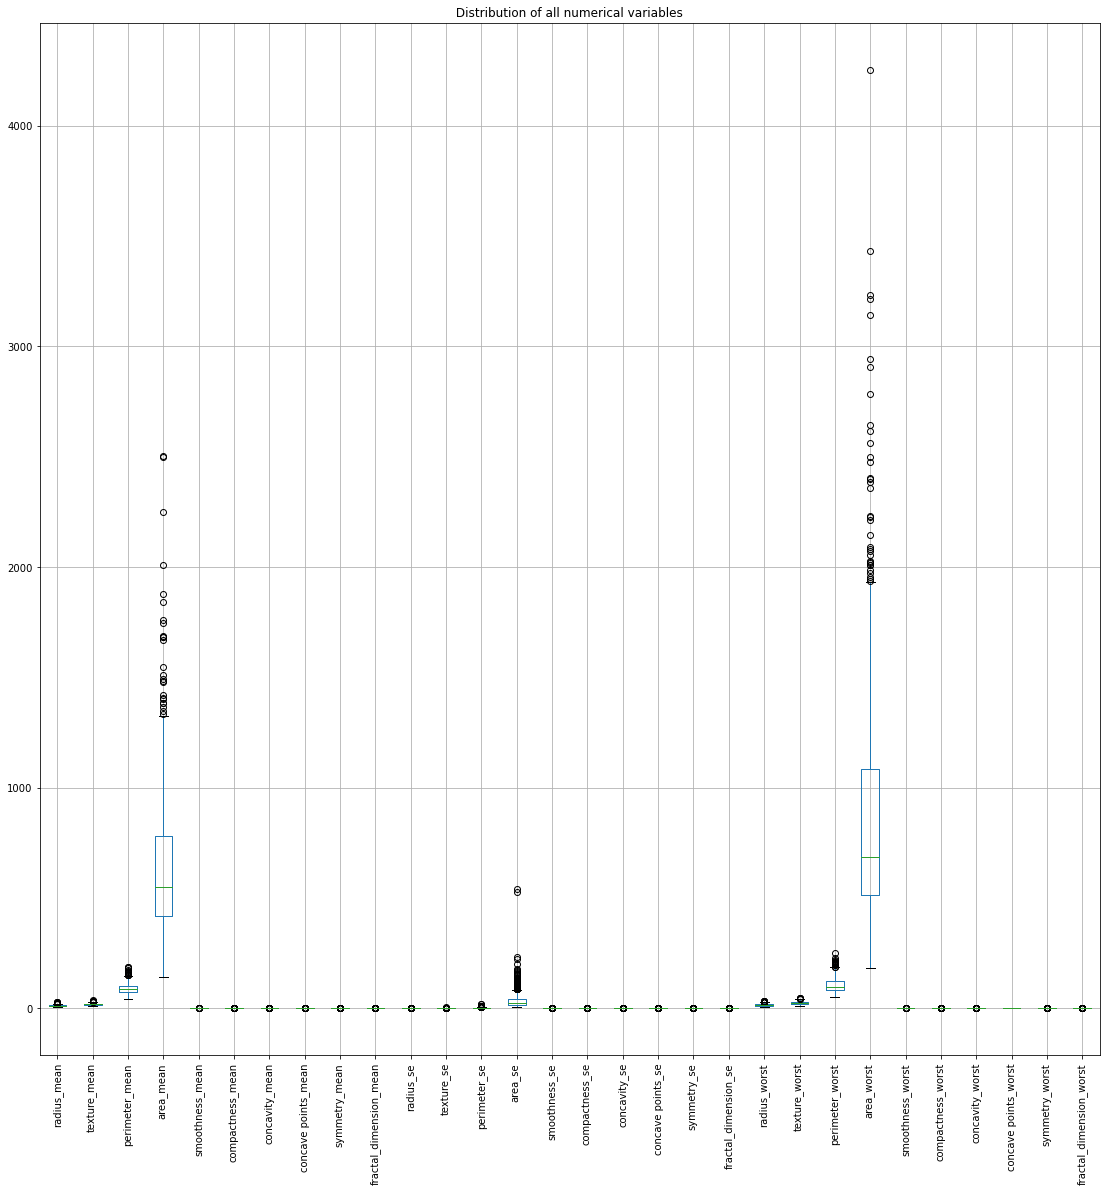

In [19]:
#we don't require the id column so we drop that
# data.drop(labels=['id'],axis=1,inplace=True)

plt.figure(figsize=(19,19))
numerical=data.select_dtypes(exclude='object')
numerical.boxplot()
plt.xticks(rotation=90)
plt.title(" Distribution of all numerical variables ")

We pick up a couple of columns that do contain outliers and hence we fix those 

In [35]:
#utility functions

def plotly_box_viz(df,col):
    fig=px.box(df,x=col,notched=True)
    fig.show()

def plotly_xy_boxplot(df,col,col2):
    fig=px.box(df,x=col,y=col2,notched=True)
    fig.show()
#function to plot a histogram
def hist_viz(df,col):
    fig=px.histogram(data,x=col,marginal="box")
    fig.show()
    
def hist_xy_viz(df,col,col2):
    fig=px.histogram(data,x=col,color=col2,marginal="box")
    fig.show()
    
    

# Radius Mean

In [29]:
import plotly.express as px

plotly_box_viz(data,"radius_mean")

In [30]:
plotly_xy_boxplot(data,"radius_mean","diagnosis")

In [27]:
fig=px.histogram(data,x='radius_mean',marginal="box")
fig.show()

The distribution of the radius seems to be slightly skewed to the right and hence having a longer tail, this implies more outliers / values that are less than the median value.

The lowest radius_mean: 6.9 
The highest is 28.11
with the median at 13.37 


The radius mean has a couple of outliers especially in the higher side.Lets have a look at the distribution

In [36]:
hist_xy_viz(data,"radius_mean","diagnosis")

We do have a different distribution when we classify the radius_mean by the outcome of the diagnosis. We note that the radius for malignanat celss has increased and the minimum for this is 10.95, the median is 17.3 and maximum 28.1 

Those for the benign has a lower and more positive kurtosis with its lowest value at 6.9, max value 17.85 the median as 12.2

## Texture_mean

In [37]:
plotly_box_viz(data,"texture_mean")

In [38]:
plotly_xy_boxplot(data,"texture_mean","diagnosis")

In [39]:
hist_viz(data,"texture_mean")

In [40]:
hist_xy_viz(data,"texture_mean","diagnosis")

## Findings

In the texture mean feature distribution is positively skewed and has a longer right tail. This interprates to more values on the left of the mean (more values are lower than the mean) mode is less than the mean and the median 

When we however split the findings on the diganosis we do find the distribution changes for the texture_mean. The combined had a minimum value of 9.71 with a max of 39.8 
The texture mean of a cell that is malignant rose to  10 with the highest at 39 the median value was 21.46 
The benign cell had a lowest of 9.7 and max of 33 with the median value as 17

## Compactness_mean

In [41]:
plotly_box_viz(data,"compactness_mean")

In [43]:
plotly_xy_boxplot(data,"compactness_mean","diagnosis")

In [45]:
hist_xy_viz(data,"compactness_mean","diagnosis")

## Concavity_mean

In [46]:
plotly_box_viz(data,"concavity_mean")

In [48]:
hist_viz(data,"concavity_mean")

In [47]:
hist_xy_viz(data,"concavity_mean","diagnosis")

## Symetry mean

In [49]:
plotly_box_viz(data,"symmetry_mean")

In [50]:
hist_viz(data,"symmetry_mean")

In [51]:
hist_xy_viz(data,"symmetry_mean","diagnosis")

# Dealing with outliers

In [53]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [57]:
data['diagnosis']=np.where(data['diagnosis']=='M',0,1)

In [58]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [59]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[1.29767572 1.09706398 2.07333501 ... 2.29607613 2.75062224 1.93701461]
 [1.29767572 1.82982061 0.35363241 ... 1.0870843  0.24388967 0.28118999]
 [1.29767572 1.57988811 0.45618695 ... 1.95500035 1.152255   0.20139121]
 ...
 [1.29767572 0.70228425 2.0455738  ... 0.41406869 1.10454895 0.31840916]
 [1.29767572 1.83834103 2.33645719 ... 2.28998549 1.91908301 2.21963528]
 [0.77060855 1.80840125 1.22179204 ... 1.74506282 0.04813821 0.75120669]]


In [116]:
threshold = 3
print(np.where(z > 3))

(array([  0,   3,   3,   3,   3,   3,   3,   3,   3,   9,   9,   9,  12,
        12,  12,  12,  12,  14,  14,  23,  25,  31,  31,  35,  42,  42,
        42,  60,  68,  68,  68,  68,  71,  71,  71,  71,  72,  78,  78,
        78,  78,  78,  82,  82,  82,  82,  82,  82,  82,  83, 105, 105,
       108, 108, 108, 108, 108, 108, 112, 112, 116, 119, 119, 122, 122,
       122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
       138, 138, 146, 146, 146, 151, 151, 152, 152, 152, 152, 152, 152,
       176, 176, 180, 180, 180, 180, 180, 180, 180, 181, 181, 190, 190,
       190, 190, 190, 192, 202, 203, 212, 212, 212, 212, 212, 212, 212,
       213, 213, 213, 213, 213, 219, 219, 232, 236, 236, 239, 239, 258,
       258, 258, 259, 259, 265, 265, 265, 265, 265, 288, 288, 290, 290,
       314, 314, 318, 323, 339, 339, 345, 351, 352, 352, 352, 352, 352,
       352, 352, 352, 368, 368, 370, 376, 376, 376, 379, 379, 379, 388,
       389, 400, 416, 417, 417, 430, 461, 461, 461, 461, 461, 4

In [60]:
data = data[(z < 3).all(axis=1)]

In [61]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,1,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
563,0,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


In [62]:
data.reset_index()

,index,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,5,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,6,0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,560,1,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
491,563,0,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
492,564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
493,565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 31 Text major ticklabel objects>)

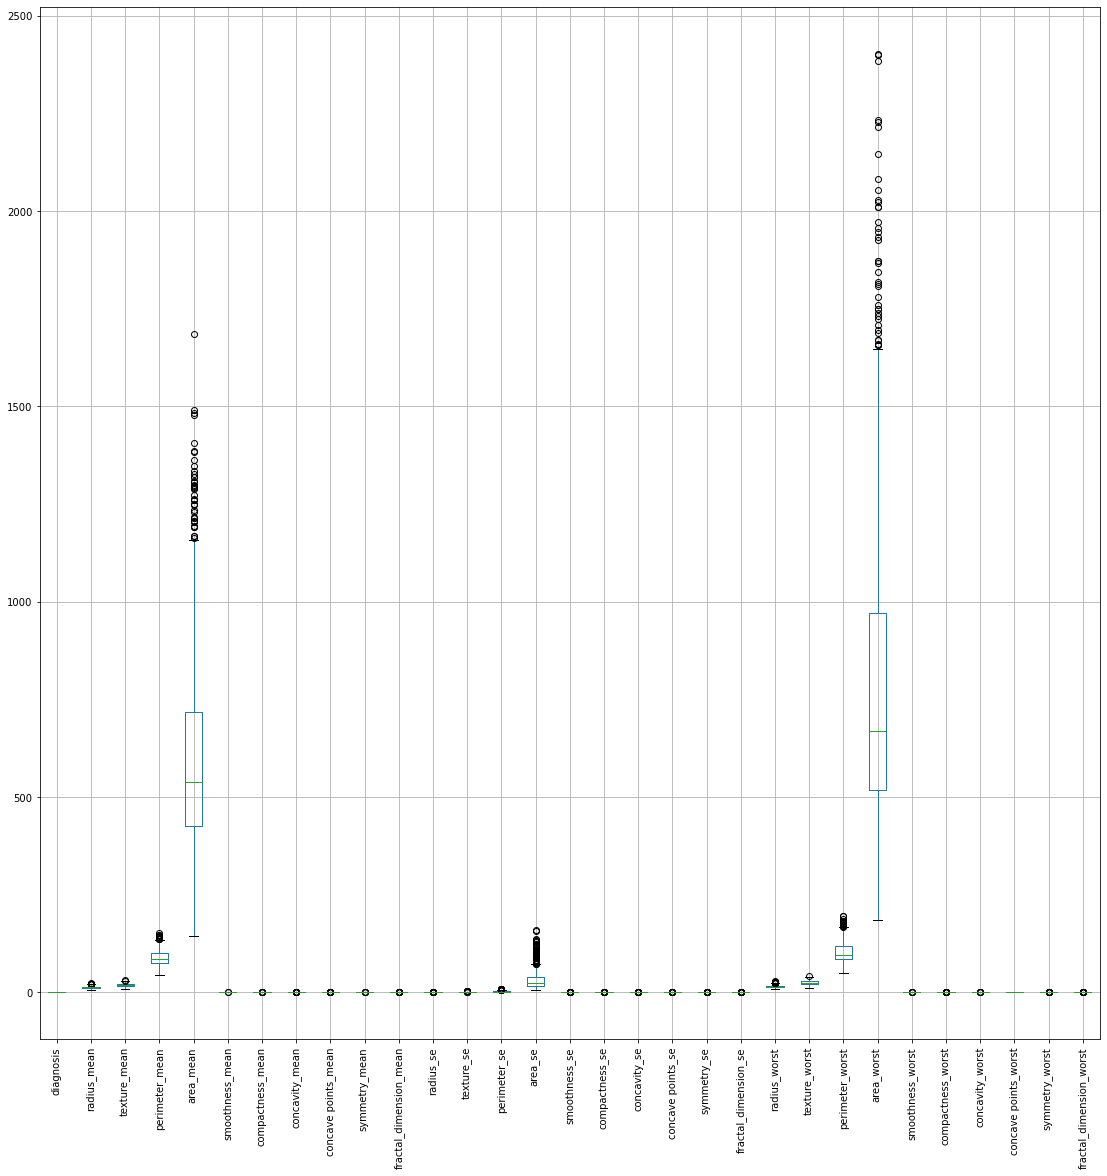

In [63]:
plt.figure(figsize=(19,19))

data.boxplot()
plt.xticks(rotation=90)

In [126]:
#we define a function that will help us deal with this outliers

def sort_outliers_high(data,cols):
    for i in tq(range(1),desc="Correcting outliers"): 
        percentile25 = data[cols].quantile(0.25)
        percentile75 = data[cols].quantile(0.75)
        
        iqr=percentile75-percentile25
        
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        
#         data[data[cols] > upper_limit]
#         data[data[cols] < lower_limit]
        
        data=data[data[cols] < upper_limit]

        
    return data  



In [147]:
# num.columns
# for col in num.columns:
#     data=sort_outliers_high(data,col)

In [148]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
40,855167,M,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,...,15.930,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592
551,923780,B,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,...,12.020,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,13.890,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 30 Text major ticklabel objects>)

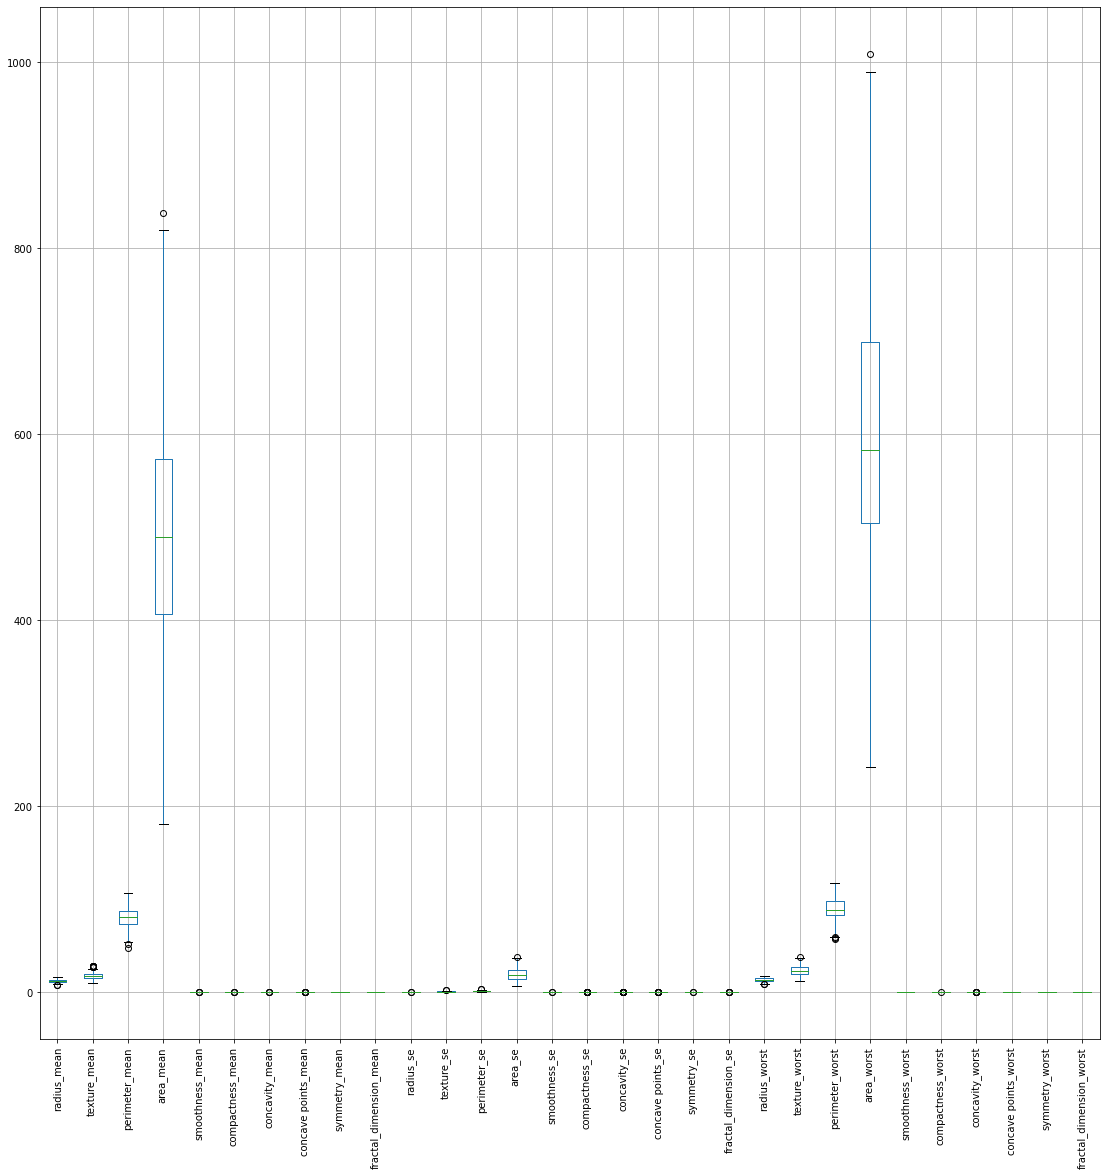

In [149]:
plt.figure(figsize=(19,19))
tes=data.drop(labels='id',axis=1)
tes.boxplot()
plt.xticks(rotation=90)

In [150]:

fig = px.box(data, x="radius_mean",notched=True)
fig.show()

In [151]:
fig=px.histogram(data,x='radius_mean',marginal="box")
fig.show()

In [153]:
data.to_csv('../data/preped_data.csv',index=False)

## Correlation Map

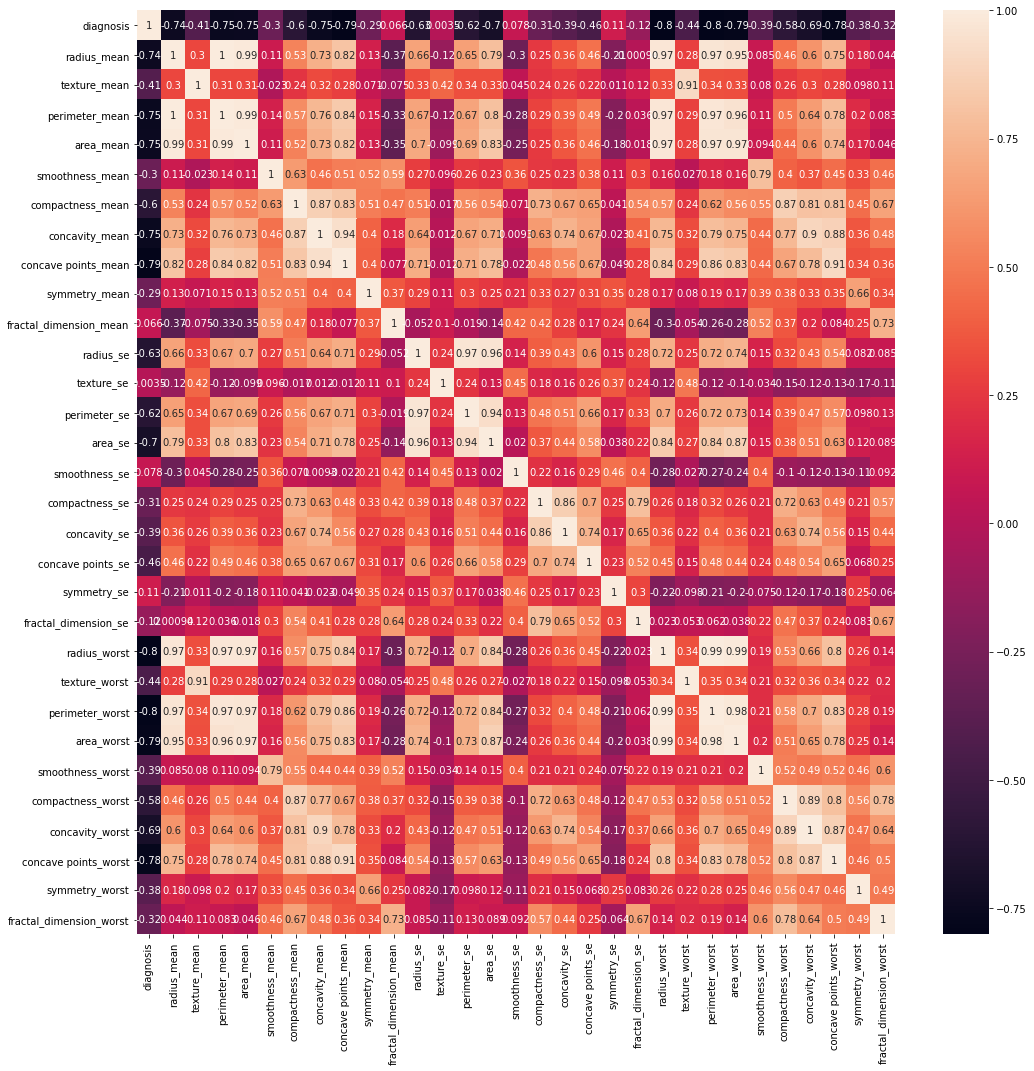

In [65]:
plt.figure(figsize=(17,17))
sns.heatmap(data.corr(),annot=True)

### Assumption

Some of the key factors that do influence the diagnosis are:
1. radius_mean
2. textute_mean
3. area_mean
4. concativity_mean
5. area_se
6. radius_worst
7. fractical_dimesnsion_mean

We do get a very strong corelation between : radius, area and mean
We don't need these and hence we can drop them 

In [66]:
drop=['area_se','area_mean','area_worst','perimeter_worst','perimeter_se','perimeter_mean']
data.drop(labels=drop,axis=1,inplace=True)
data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,0,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,0,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,0,12.45,15.70,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,...,0.02165,0.005082,15.47,23.75,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,0,18.25,19.98,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,...,0.01369,0.002179,22.88,27.66,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,1,14.05,27.15,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,...,0.02080,0.005304,15.30,33.17,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
563,0,20.92,25.09,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,...,0.02057,0.006213,24.29,29.41,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,0,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.01114,0.004239,25.45,26.40,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.01898,0.002498,23.69,38.25,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


In [76]:
data.to_csv("../data/final_data.csv",index=False)

In [74]:
!pip install causalgraphicalmodels
from causalgraphicalmodels import CausalGraphicalModel

ModuleNotFoundError: No module named 'causalgraphicalmodels'

ModuleNotFoundError: No module named 'causalgraphicalmodels'